In [4]:
import pandas as pd

# Cargar el archivo usando read_csv()
IGT = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/CPM Data/CPM_IGT.txt', sep='\t') 
ND= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/CPM Data/CPM_ND.txt', sep='\t') 
T2D= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/CPM Data/CPM_T2D.txt', sep='\t') 
T3cD= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/CPM Data/CPM_T3cD.txt', sep='\t') 

In [21]:
import pandas as pd

# Suponiendo que ya has cargado los DataFrames IGT, ND, T2D y T3cD

# Fusionar los DataFrames usando merge
df = pd.merge(IGT, ND, on='symbol', how='outer', suffixes=('_IGT', '_ND'))
df = pd.merge(df, T2D, on='symbol', how='outer', suffixes=('', '_T2D'))
df = pd.merge(df, T3cD, on='symbol', how='outer', suffixes=('', '_T3cD'))

# Establecer la columna 'symbol' como el índice
df.set_index('symbol', inplace=True)

# Ahora, 'df' es el DataFrame combinado con la columna 'symbol' como índice
df

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,32.988692,7.215164,26.590314,18.135376,9.776163,5.803730,21.742785,17.603092,22.386237,11.200891,...,15.363177,24.082831,27.544083,25.644251,47.060756,30.306885,13.529609,31.497440,18.338337,18.981066
TNMD,0.000000,0.000000,0.046896,0.371192,0.106843,0.000000,0.000000,0.093385,0.000000,0.000000,...,0.049399,0.000000,0.093475,0.000000,0.000000,0.000000,0.189889,0.356191,0.000000,0.000000
DPM1,39.014024,34.852909,41.831675,29.589297,32.373522,35.233264,38.065815,50.381263,41.082435,34.024212,...,45.150945,51.525178,34.025044,49.093907,42.659390,36.689506,50.605484,47.831331,50.625978,48.834780
SCYL3,18.753845,18.832800,13.365502,18.612622,11.058282,16.127179,14.155127,25.867674,15.744167,10.237373,...,10.719645,12.645373,11.653266,14.142947,16.638129,16.273571,14.146749,15.468856,15.904814,14.097588
C1orf112,3.238616,1.956655,2.016549,2.969535,2.991613,3.338429,3.124330,3.735404,2.017221,2.408794,...,2.716961,1.396653,2.212251,1.259860,4.739932,4.691861,1.756476,1.221225,2.563891,2.948515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DHRS4L1,0.075317,0.000000,0.046896,1.219631,0.373952,0.462244,0.000000,0.093385,0.295203,0.421539,...,0.049399,0.377474,0.280426,0.447047,0.338567,0.000000,0.379778,0.000000,0.043456,0.138212
TUSC2P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
H2BK1,0.075317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


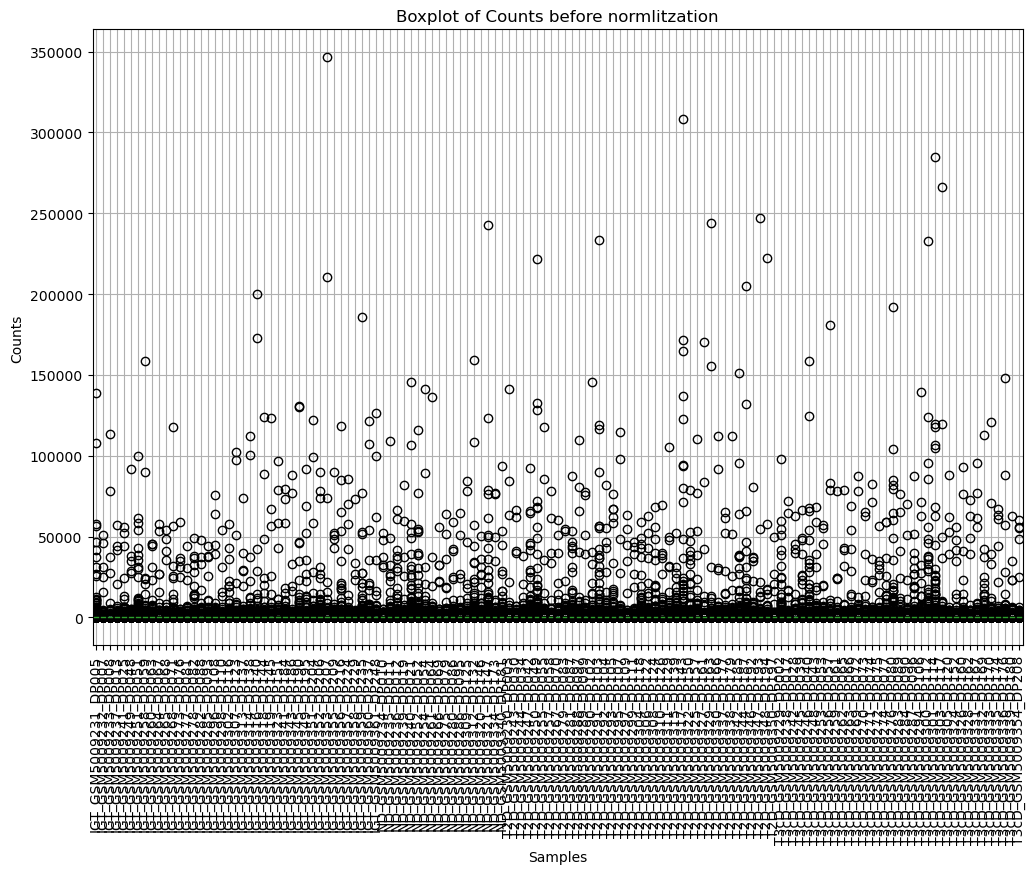

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

df.boxplot()
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

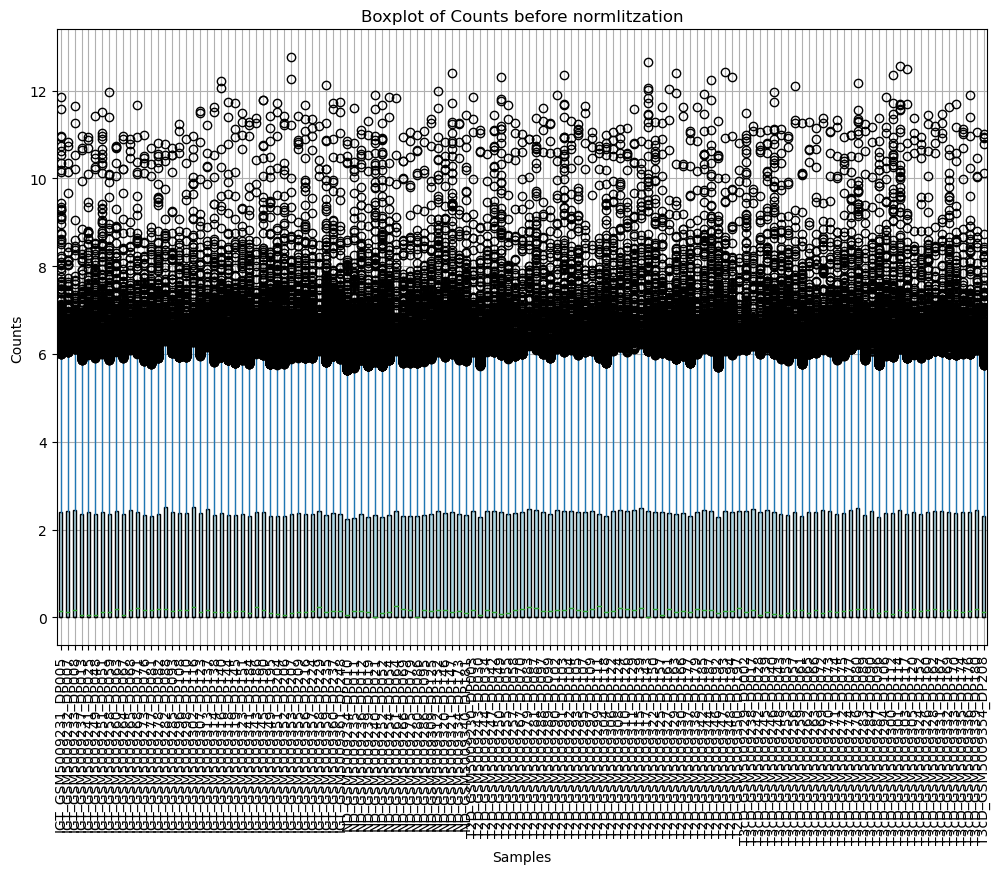

In [25]:
import numpy as np
df_t= np.log1p(df)
df_t

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

df_t.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')

plt.xticks(rotation=90)
plt.show()

In [32]:
import pandas as pd

ta= df.T
ta
ta['conditions'] = ta.index.map(lambda x: 'ND' if 'ND' in x else 'IGT' if 'IGT' in x else 'T2D' if 'T2D' in x else 'T3cD')
# Establecer 'conditions' como índice
ta.set_index('conditions', inplace=True)
ta.index.name = None

# Añadir la columna "patologia" basada en el índice
ta['patologia'] = ta.index.map(lambda x: 'ND' if 'ND' in x else 'IGT' if 'IGT' in x else 'T2D' if 'T2D' in x else 'T3cD')

# Mover el índice a una nueva columna
ta.reset_index(inplace=True)

# Cambiar el nombre de la nueva columna a 'patologia' y eliminar la columna anterior
ta = ta.rename(columns={'index': 'patologia'}).iloc[:, :-1]

ta


symbol,patologia,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,LOC101928168,PDGFRL2P,SOD2-OT1,POLR2J3,TUSC2P2,DHRS4L1,TUSC2P1,H2BK1,LOC101928523,LOC112267968
0,IGT,32.988692,0.000000,39.014024,18.753845,3.238616,0.150633,21.314611,32.084892,24.402594,...,0.000000,0.0,0.000000,0.753166,0.0,0.075317,0.0,0.075317,0.150633,0.075317
1,IGT,7.215164,0.000000,34.852909,18.832800,1.956655,0.122291,11.373055,26.047964,28.799509,...,0.061145,0.0,0.000000,0.428018,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,IGT,26.590314,0.046896,41.831675,13.365502,2.016549,2.954479,60.355791,47.412358,20.915837,...,0.000000,0.0,0.000000,0.234482,0.0,0.046896,0.0,0.000000,0.000000,0.187586
3,IGT,18.135376,0.371192,29.589297,18.612622,2.969535,0.000000,6.893564,27.362146,19.567116,...,0.000000,0.0,0.000000,1.484768,0.0,1.219631,0.0,0.000000,0.000000,0.636329
4,IGT,9.776163,0.106843,32.373522,11.058282,2.991613,0.000000,3.045034,28.046368,21.154975,...,0.000000,0.0,0.000000,1.816336,0.0,0.373952,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,T3cD,30.306885,0.000000,36.689506,16.273571,4.691861,1.098994,103.812705,36.182278,19.232403,...,0.000000,0.0,0.000000,0.929918,0.0,0.000000,0.0,0.000000,0.000000,0.211345
129,T3cD,13.529609,0.189889,50.605484,14.146749,1.756476,2.088782,27.106690,38.310155,18.656618,...,0.000000,0.0,0.047472,0.759557,0.0,0.379778,0.0,0.000000,0.000000,0.379778
130,T3cD,31.497440,0.356191,47.831331,15.468856,1.221225,1.272110,54.955146,40.809284,18.623688,...,0.000000,0.0,0.000000,0.661497,0.0,0.000000,0.0,0.000000,0.305306,0.203538
131,T3cD,18.338337,0.000000,50.625978,15.904814,2.563891,8.908434,43.933788,47.019148,20.641493,...,0.000000,0.0,0.000000,0.738748,0.0,0.043456,0.0,0.000000,0.000000,0.043456


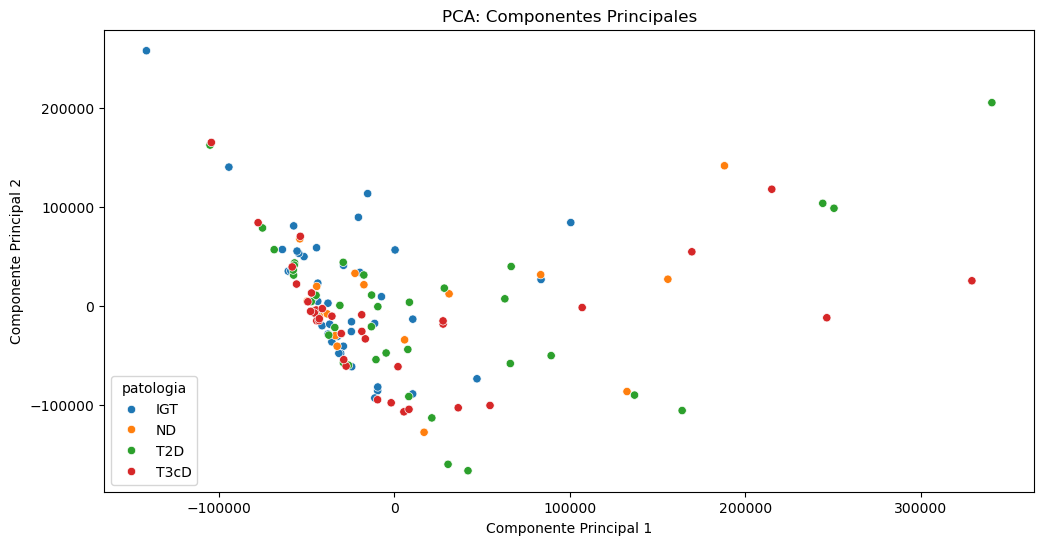

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = ta.iloc[:, 1:35002].values  
y = ta.loc[:, ["patologia"]].values

pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 6))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")



plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()